Problem Statement: To Predict the Price of Used Cars based on features provided in the dataset


Metric: RMSE(Root Mean Squared Error)

In [44]:
# Import Neccessary Libraries
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')


In [45]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_csv("/content/drive/MyDrive/Csv/dsn_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Csv/dsn_test.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [47]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


# EXPLORATORY DATA ANALYSIS (EDA)


Missing values:
clean_title     21419
fuel_type        5083
accident         2452
brand               0
id                  0
milage              0
model_year          0
model               0
engine              0
ext_col             0
transmission        0
int_col             0
price               0
dtype: int64

Unique counts:
id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64
count    1.885330e+05
mean     4.387802e+04
std      7.881952e+04
min      2.000000e+03
25%      1.700000e+04
50%      3.082500e+04
75%      4.990000e+04
max      2.954083e+06
Name: price, dtype: float64


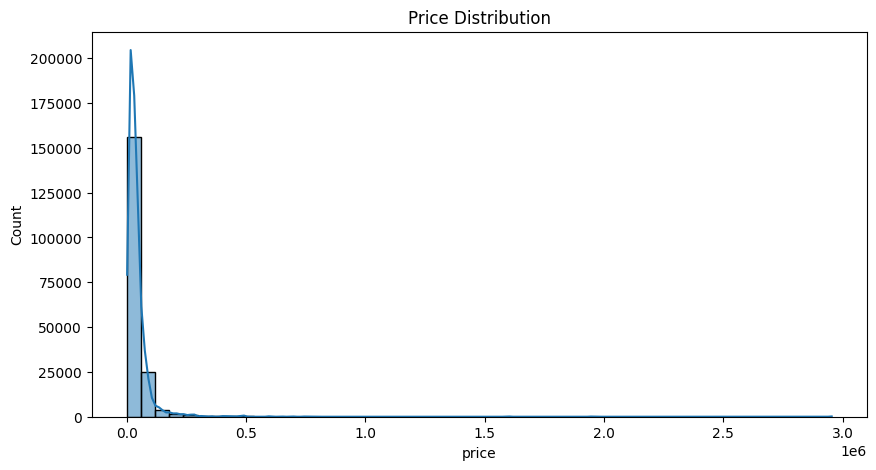

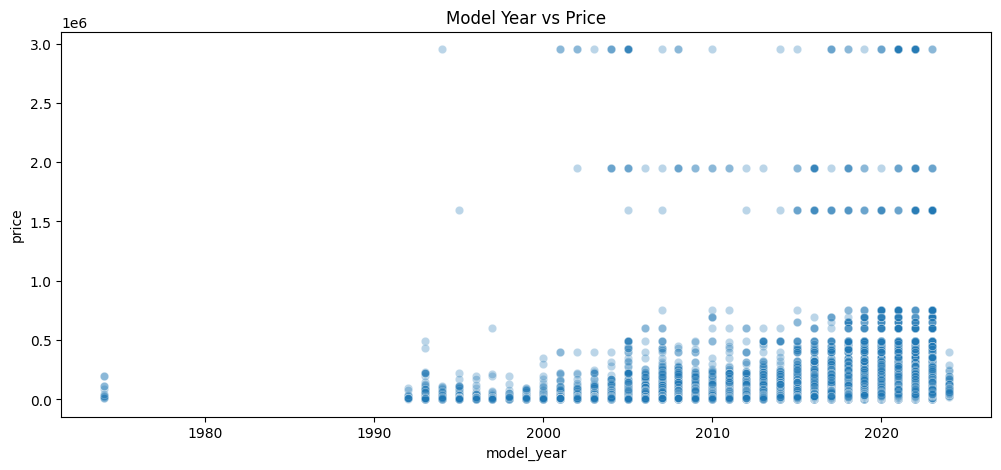

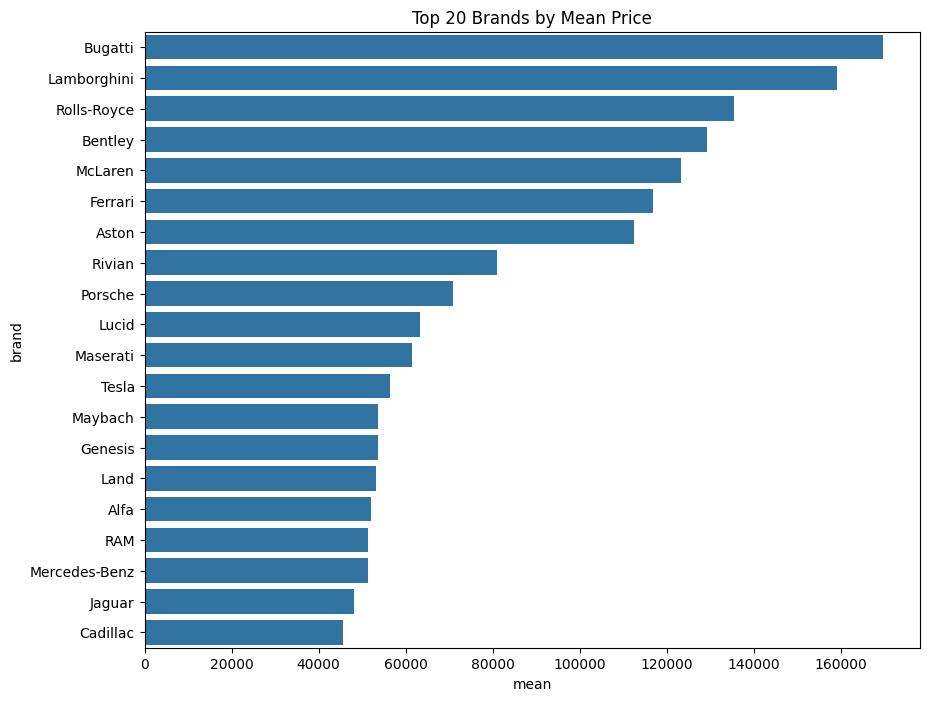

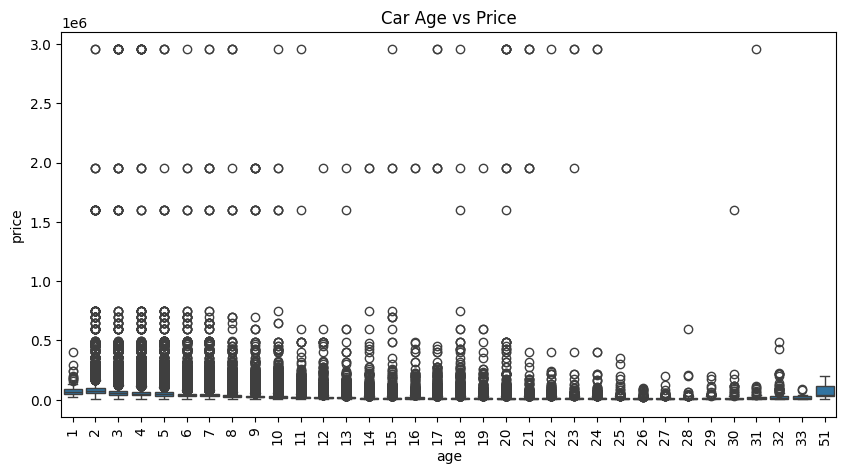

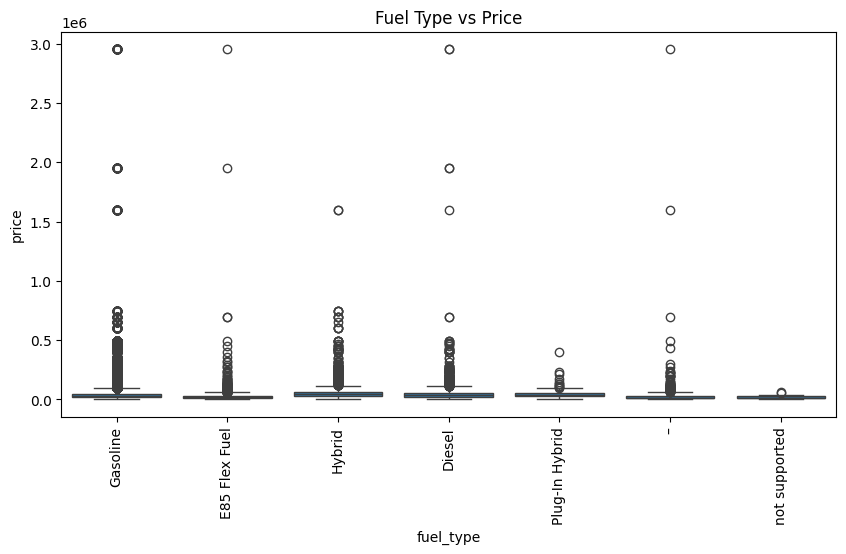

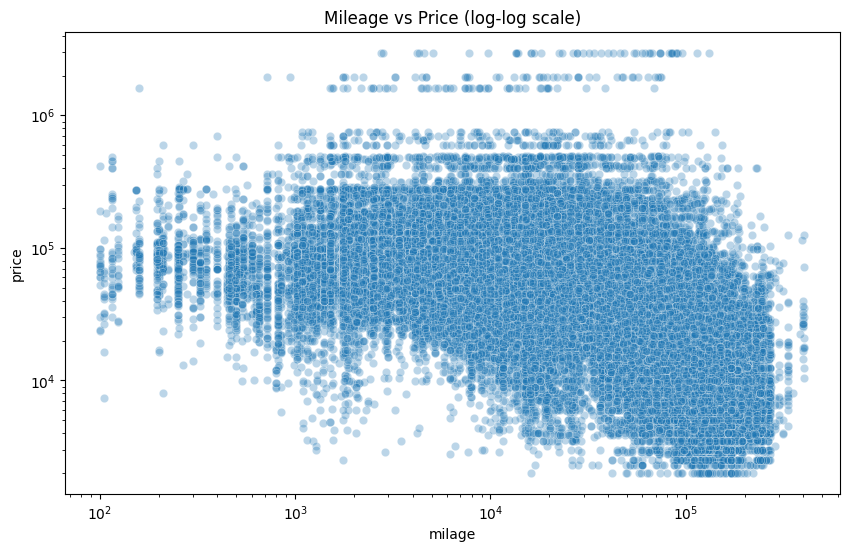

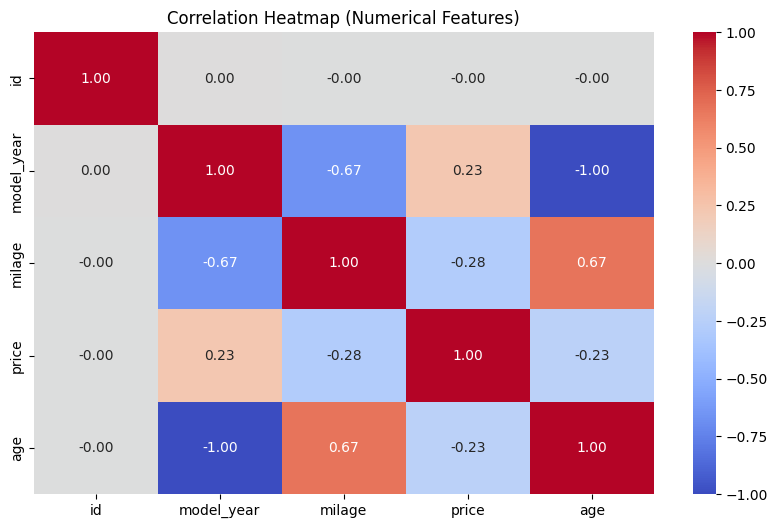

In [50]:
# Dataset structure & Missing Values

print("\nMissing values:")
print(train_data.isnull().sum().sort_values(ascending=False))

# Unique Count
print("\nUnique counts:")
print(train_data.nunique())

print(train_data["price"].describe())

# Histogram of price
plt.figure(figsize=(10,5))
sns.histplot(train_data["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Model year vs Price
plt.figure(figsize=(12,5))
sns.scatterplot(x="model_year", y="price", data=train_data, alpha=0.3)
plt.title("Model Year vs Price")
plt.show()


 # Top Brands
brand_stats = train_data.groupby("brand")["price"].agg(["count","mean","median"]).sort_values("mean", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(y=brand_stats.index[:20], x=brand_stats["mean"][:20])
plt.title("Top 20 Brands by Mean Price")
plt.show()

# Car Age VS Price
REF_YEAR = 2025
train_data["age"] = REF_YEAR - train_data["model_year"]
plt.figure(figsize=(10,5))
sns.boxplot(x="age", y="price", data=train_data)
plt.title("Car Age vs Price")
plt.xticks(rotation=90)
plt.show()

# Fuel Type Vs Price
plt.figure(figsize=(10,5))
sns.boxplot(x="fuel_type", y="price", data=train_data)
plt.xticks(rotation=90)
plt.title("Fuel Type vs Price")
plt.show()

# Outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x="milage", y="price", data=train_data, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.title("Mileage vs Price (log-log scale)")
plt.show()


# Correlations
num_cols = train_data.select_dtypes(include=[np.number]).columns
corr = train_data[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()



# Preprocessing

In [51]:
# Data Preprocessing and feature engineering

#Save ID before dropping

test_ids = test_data["id"].copy()

# Drop 'id' column to prevent data leakage
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

# Feature engineering function
def feature_engineering(df):
    # Create "age" from model_year
    if 'model_year' in df.columns:
        df['age'] = 2025 - df['model_year']
        df = df.drop(columns=['model_year'])

    # Extract numeric engine capacity
    if 'engine' in df.columns:
        df['engine'] = df['engine'].str.extract('(\d+)').astype(float)

    # Convert mileage to numeric
    if 'milage' in df.columns:
        df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

    # Luxury brand indicator
    if 'brand' in df.columns:
        df['is_luxury'] = df['brand'].isin(['BMW', 'Mercedes-Benz']).astype(int)

    # Power-to-weight ratio
    if 'engine' in df.columns and 'milage' in df.columns:
        df['power_to_weight'] = df['engine'] / (df['milage'] + 1)

    return df

# Apply feature engineering
train_data = feature_engineering(train_data)
test_data = feature_engineering(test_data)

# Handle categorical columns consistently between train & test
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()
test_categorical_columns = test_data.select_dtypes(include=['object']).columns

for col in test_categorical_columns:
    category_list = sorted(train_data[col].dropna().unique())
    col_dtype = pd.CategoricalDtype(categories=category_list, ordered=False)
    train_data[col] = train_data[col].astype(col_dtype)
    test_data[col] = test_data[col].astype(col_dtype)


    # Define Targets and Features
X_train_set = train_data.drop(columns=["price"])
y_train_set = train_data["price"]
X_test_set = test_data.copy()


# Modelling

In [52]:
# Cross Validation and MOdel training

def perform_cross_validation(model_class, X_train_set, y_train_set, parameters, n_folds=5):

    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    test_predictions = np.zeros((X_test_set.shape[0], n_folds), dtype=np.float32)
    rmse_scores = []

    for fold_num, (train_idx, valid_idx) in enumerate(kfold.split(X_train_set)):
        # Split train/validation
        X_train_fold = X_train_set.iloc[train_idx]
        y_train_fold = y_train_set.iloc[train_idx]
        X_valid_fold = X_train_set.iloc[valid_idx]
        y_valid_fold = y_train_set.iloc[valid_idx]

        # Train model
        regressor = model_class(**parameters, enable_categorical=True)
        regressor.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_valid_fold, y_valid_fold)],
                      verbose=500)

        # Validation predictions
        valid_preds = regressor.predict(X_valid_fold)
        rmse = np.sqrt(mean_squared_error(y_valid_fold, valid_preds))
        rmse_scores.append(rmse)

        print(f"Fold {fold_num + 1} RMSE: {rmse:.4f}")
        print('-' * 50)

        # Test predictions
        test_predictions[:, fold_num] = regressor.predict(X_test_set)

    mean_rmse = np.mean(rmse_scores)
    print(f"\n✅ Mean Validation RMSE across {n_folds} folds: {mean_rmse:.4f}\n")

    # Average predictions across folds
    final_predictions = np.mean(test_predictions, axis=1)
    return regressor, final_predictions

xgboost_params = {
    'lambda': 0.03880258557285165,
    'alpha': 0.02129832295514386,
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'learning_rate': 0.014,
    'max_depth': 7,
    'random_state': 2020,
    'min_child_weight': 85,
    'n_estimators': 500,
    'tree_method': 'hist'
}

print('Running XGBoost Cross-Validation...\n')
xgb_trained_model, xgb_test_predictions = perform_cross_validation(
    XGBRegressor, X_train_set, y_train_set, xgboost_params)


Running XGBoost Cross-Validation...

[0]	validation_0-rmse:74424.90388
[499]	validation_0-rmse:67929.22741
Fold 1 RMSE: 67929.2281
--------------------------------------------------
[0]	validation_0-rmse:74725.06445
[499]	validation_0-rmse:68620.40375
Fold 2 RMSE: 68620.4056
--------------------------------------------------
[0]	validation_0-rmse:79485.47608
[499]	validation_0-rmse:73887.00392
Fold 3 RMSE: 73887.0022
--------------------------------------------------
[0]	validation_0-rmse:82317.05833
[499]	validation_0-rmse:76331.90288
Fold 4 RMSE: 76331.9035
--------------------------------------------------
[0]	validation_0-rmse:82076.40279
[499]	validation_0-rmse:76230.34942
Fold 5 RMSE: 76230.3473
--------------------------------------------------

✅ Mean Validation RMSE across 5 folds: 72599.7773



In [53]:
# To make submission

submission = pd.DataFrame({
    "id": test_ids,
    "price": xgb_test_predictions.astype(np.float32)
})

submission.to_csv("/content/drive/MyDrive/Csv/submission_final.csv", index=False)
print("✅ Submission file saved at: /content/drive/MyDrive/Csv/submission_final.csv")

✅ Submission file saved at: /content/drive/MyDrive/Csv/submission_final.csv


In [54]:
submission.head()

,id,price
0,188533,16701.416016
1,188534,77805.335938
2,188535,49626.539062
3,188536,28471.886719
4,188537,28830.488281
